In [20]:
# %load init_setup/setup.py
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [21]:
# %load init_setup/setup2.py
matplotlib.rcParams.update({'font.size': 16})


In [22]:
def filter_spaces(word):
    if (word == ''):
        return False
    else:
        return True

# Read a file containing an array of arbitrary size
def file_to_nDarrs(filename):
    arr = []
    f = open(filename, 'r')
    
    for line in f:
        orig_arr  = line.replace("\n", "").split(" ")
        filt_arr  = list(filter(filter_spaces, orig_arr))
        float_arr = []
        for x in filt_arr:
            float_arr.append(float(x))
        if len(float_arr) == 1:
            arr.append(float_arr[0])
        else:
            arr.append(np.array(float_arr))
    f.close()
    return np.array(arr)

In [42]:
MDIR        = "data/KF_tests/"
SVECSDIR    = "init_statevecs/"
DUPEDSSDIR  = "duped_stepsize/"
CHI2DIFFDIR = "chi2_diff/"
EVENTFILENAMES = ["e005", "e006", "e012", "e017", "e025", "e030",
                  "e035", "e036", "e038", "e040", "e048", "e052",
                  "e055", "e057", "e059", "e060", "e063", "e067",
                  "e069", "e071", "e080", "e082", "e083", "e088",
                  "e089", "e092", "e095", "e103", "e113", "e119",
                  "e123", "e124", "e130", "e134", "e138", "e139"]


init_statevecs = []
chi2_diff = []
for e_filename in EVENTFILENAMES:
    init_statevecs.append(file_to_nDarrs(MDIR + SVECSDIR + e_filename))
    chi2_diff.append(file_to_nDarrs(MDIR + CHI2DIFFDIR + e_filename))
init_statevec067_iter1000 = file_to_nDarrs(MDIR + SVECSDIR + "e067_iter1000")
init_statevec103_iter1000 = file_to_nDarrs(MDIR + SVECSDIR + "e103_iter1000")
    
duped_stepsize = file_to_nDarrs(MDIR + DUPEDSSDIR + "orig")
sv_distance    = file_to_nDarrs(MDIR + SVECSDIR   + "sv_distance").transpose()

In [29]:
def scatter_plot(sv_list, x_ax, y_ax, x_label, y_label, x_range=[-100,100], y_range=[-100,100], c_size=5):
    fig, ax = plt.subplots()
    fig.set_size_inches((14,9))

    circles = []
    for i in range(len(sv_list)):
        circles.append(plt.Circle((sv_list[i][0][x_ax], sv_list[i][0][y_ax]), c_size, color=accessibility_95[i], fill=False))
        ax.add_artist(circles[i])
        for j in range(len(sv_list[i])):
            ax.scatter(sv_list[i][j][x_ax], sv_list[i][j][y_ax], s=10, c=accessibility_95[i], alpha=1/(j+1))

    plt.xlim(x_range[0], x_range[1])
    plt.ylim(y_range[0], y_range[1])
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.xscale('linear')
    plt.xlabel(x_label)
    plt.yscale('linear')
    plt.ylabel(y_label)
    plt.show()
    
    return

def scatter_plot1d(sv_list, x_ax, x_label):
    fig, ax = plt.subplots()
    fig.set_size_inches((14,9))

    ellipses = []

    for i in range(len(sv_list)):
#         ellipses.append(matplotlib.patches.Ellipse((sv_list[i][0][x_ax], i), width=c_size, height=0, angle=0, color=c_bla, fill=False))
#         ax.add_artist(ellipses[i])
        for j in range(len(sv_list[i])):
            ax.scatter(sv_list[i][j][x_ax], i, s=10, c=accessibility_95[0], alpha=1/(j+1))
    
    plt.xscale('linear')
    plt.title(x_label)
    plt.yscale('linear')
    plt.show()
    
    return

def hist_subplots(arrs, labels, n_bins):
    f, axes = plt.subplots(nrows=6, ncols=2)
    f.set_size_inches((14,24))

    for i in range(0, 12, 2):
        axes[int(i/2),0].hist(arrs[i], bins=n_bins, color=accessibility_95[i])
        axes[int(i/2),0].set_title(labels[i])
        axes[int(i/2),1].hist(arrs[i+1], bins=n_bins, color=accessibility_95[i+1])
        axes[int(i/2),1].set_title(labels[i+1])
    plt.tight_layout()

    plt.show()
    return

def remove_outliers(x, outlier_constant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlier_constant
    quartile_set = (lower_quartile - IQR, upper_quartile + IQR)
    result_list = []
    for y in a.tolist():
        if y >= quartile_set[0] and y <= quartile_set[1]:
            result_list.append(y)
    return result_list

# 2D SV Domain Plots:

In [25]:
labels = ["z", "x", "y", "tx", "ty", "q", "B", 
          "covmat[0][0]", "covmat[1][1]", "covmat[2][2]", "covmat[3][3]", "covmat[4][4]",  "chi2"]
notable_events = [0, 5, 12, 17, 27, 22]
notable_statevecs = []
for i in notable_events:
    notable_statevecs.append(init_statevecs[i])

In [41]:
EVENTFILENAMES[27]

'e103'

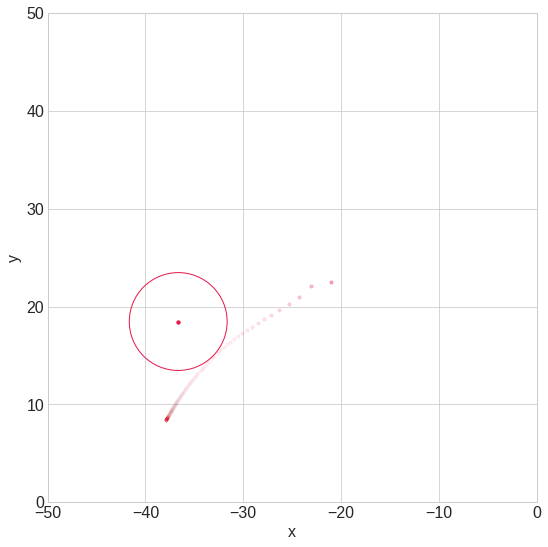

In [45]:
# scatter_plot(notable_statevecs, 0, 1, labels[1], labels[2], [-80,20], [-40,60], 5)
# scatter_plot(notable_statevecs, 2, 3, labels[3], labels[4], [-0.50,0.25], [-0.25,0.50], 0.05)
# scatter_plot([init_statevec067_iter1000], 0, 1, labels[1], labels[2], [-30,30], [0,60])
scatter_plot([init_statevec103_iter1000], 0, 1, labels[1], labels[2], [-50,0], [0,50])

# "1D" SV domain Plots:

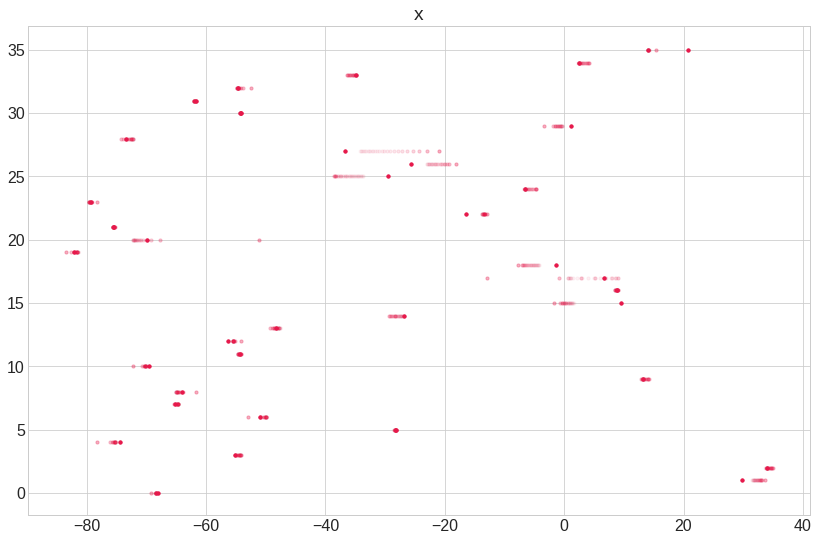

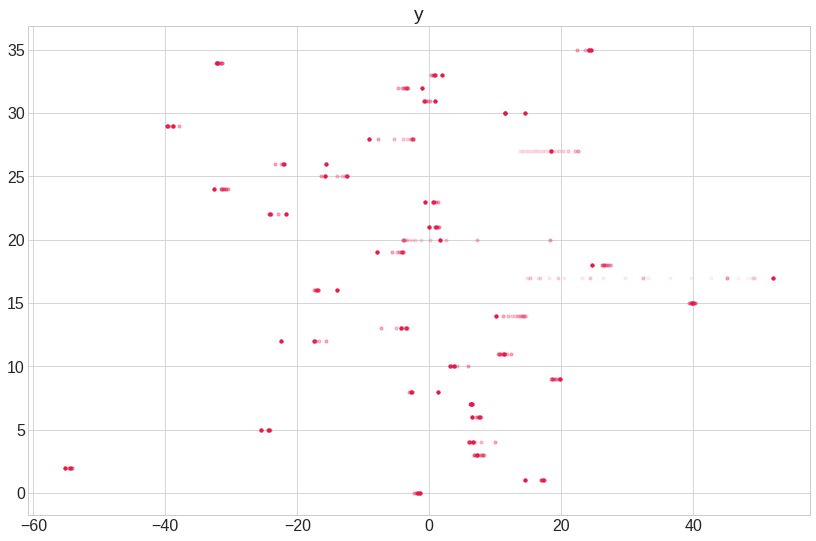

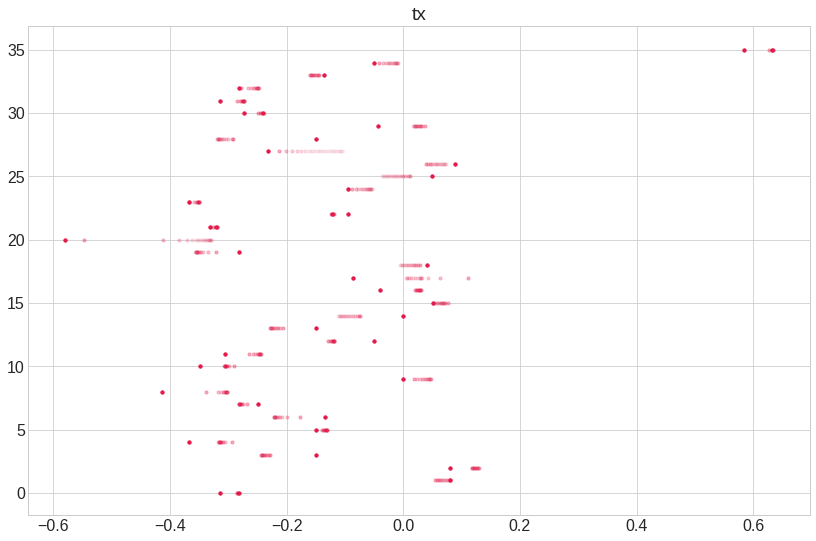

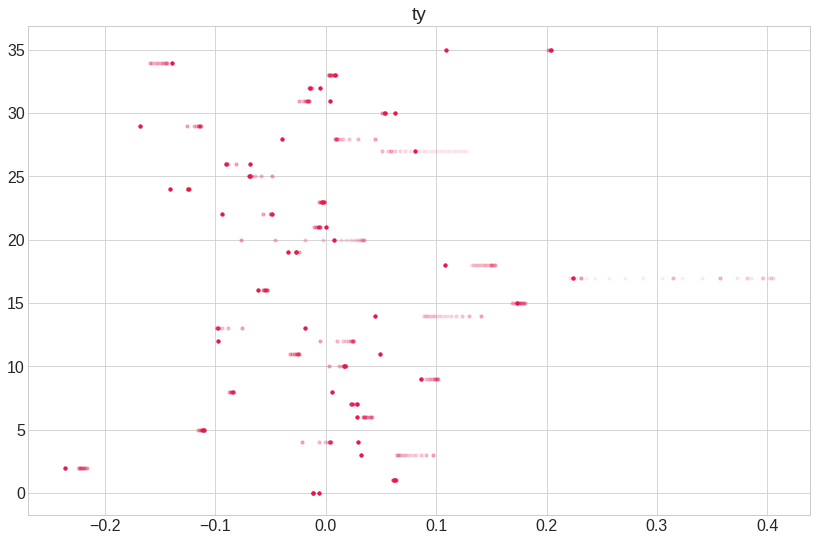

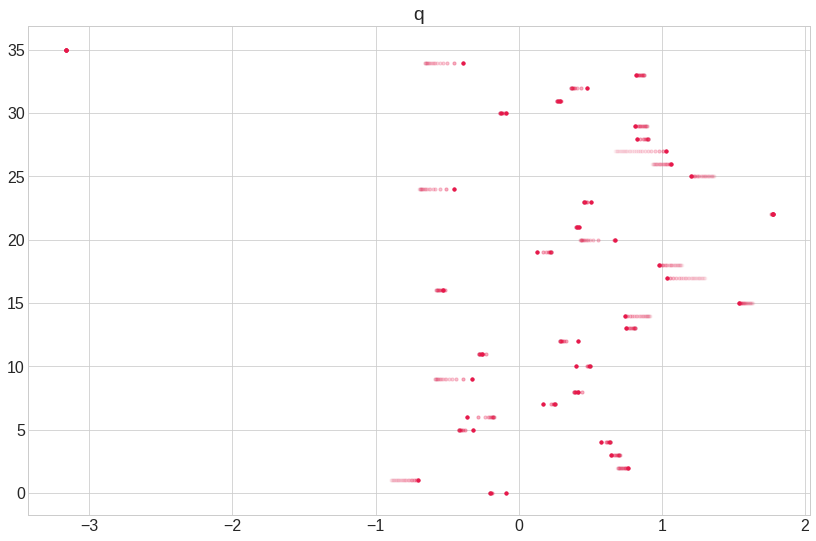

In [8]:
for i in range(0, 5):
    scatter_plot1d(init_statevecs, i, labels[i+1])

# Initial SV distance:

In [9]:
n_bins = 1000

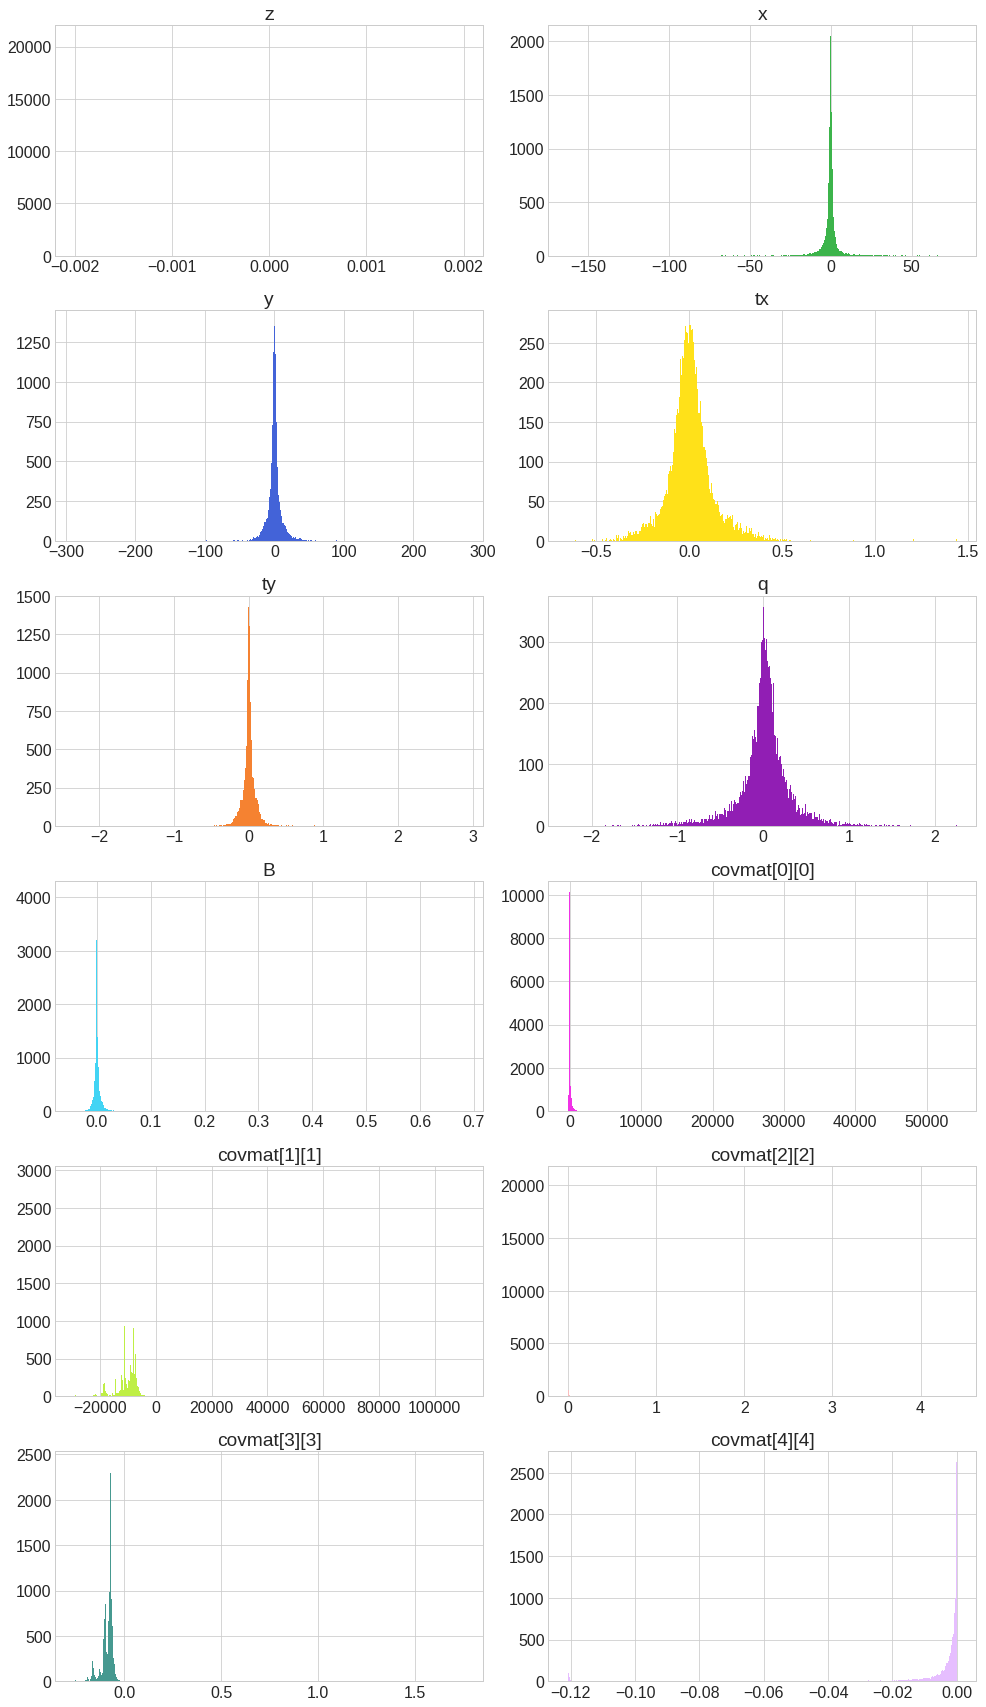

In [10]:
hist_subplots(sv_distance, labels, n_bins)

# Initial SV distance (without outliers)

In [14]:
clean_sv_distance = []
for arr in sv_distance:
    clean_sv_distance.append(remove_outliers(arr, 10))
print("removed/total: %d/%d" % (len(sv_distance[1]) - len(clean_sv_distance[1]), len(sv_distance[1])))

removed/total: 667/25091


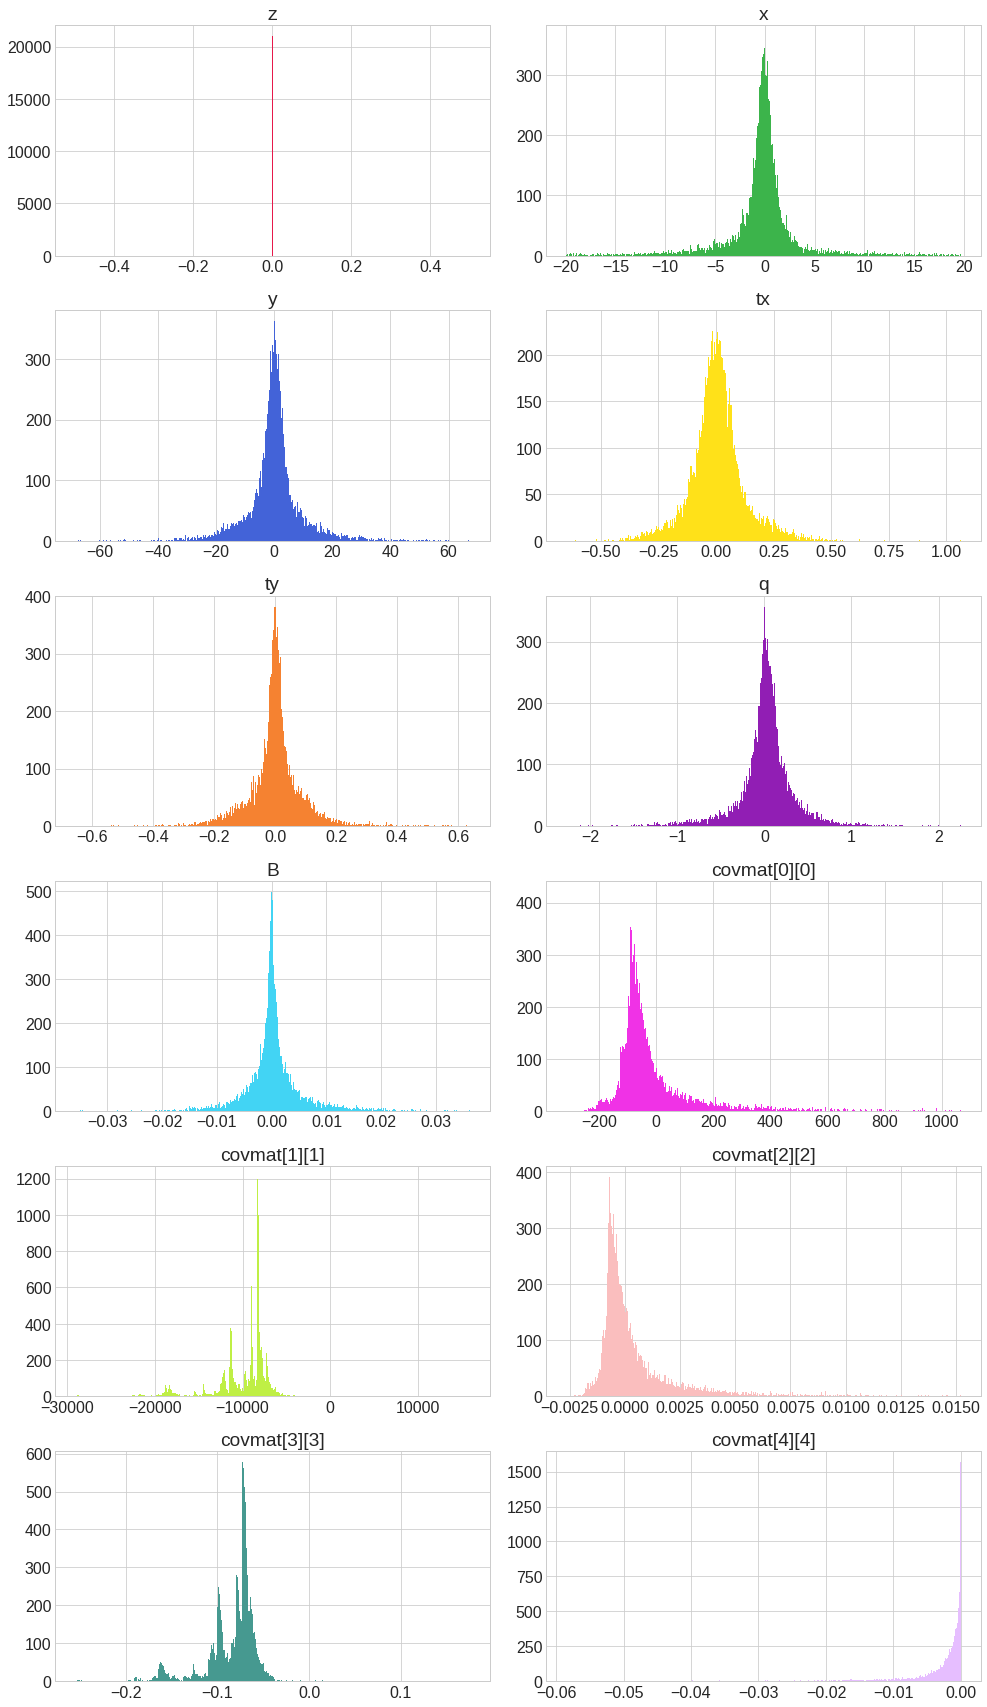

In [15]:
hist_subplots(clean_sv_distance, labels, n_bins)

# Average # of step size duplication

In [16]:
divsum = 0.
for dss in duped_stepsize:
    divsum += dss[0]/dss[1]
divsum /= len(duped_stepsize)
print("%% of steps duplicated: %5.2f%%" % (100*divsum))

% of steps duplicated:  0.21%


# Chi2 convergence

In [17]:
# chi2_diff
for arr in chi2_diff:
    for i in range(len(arr)):
        if arr[i] < 0: arr[i] = None

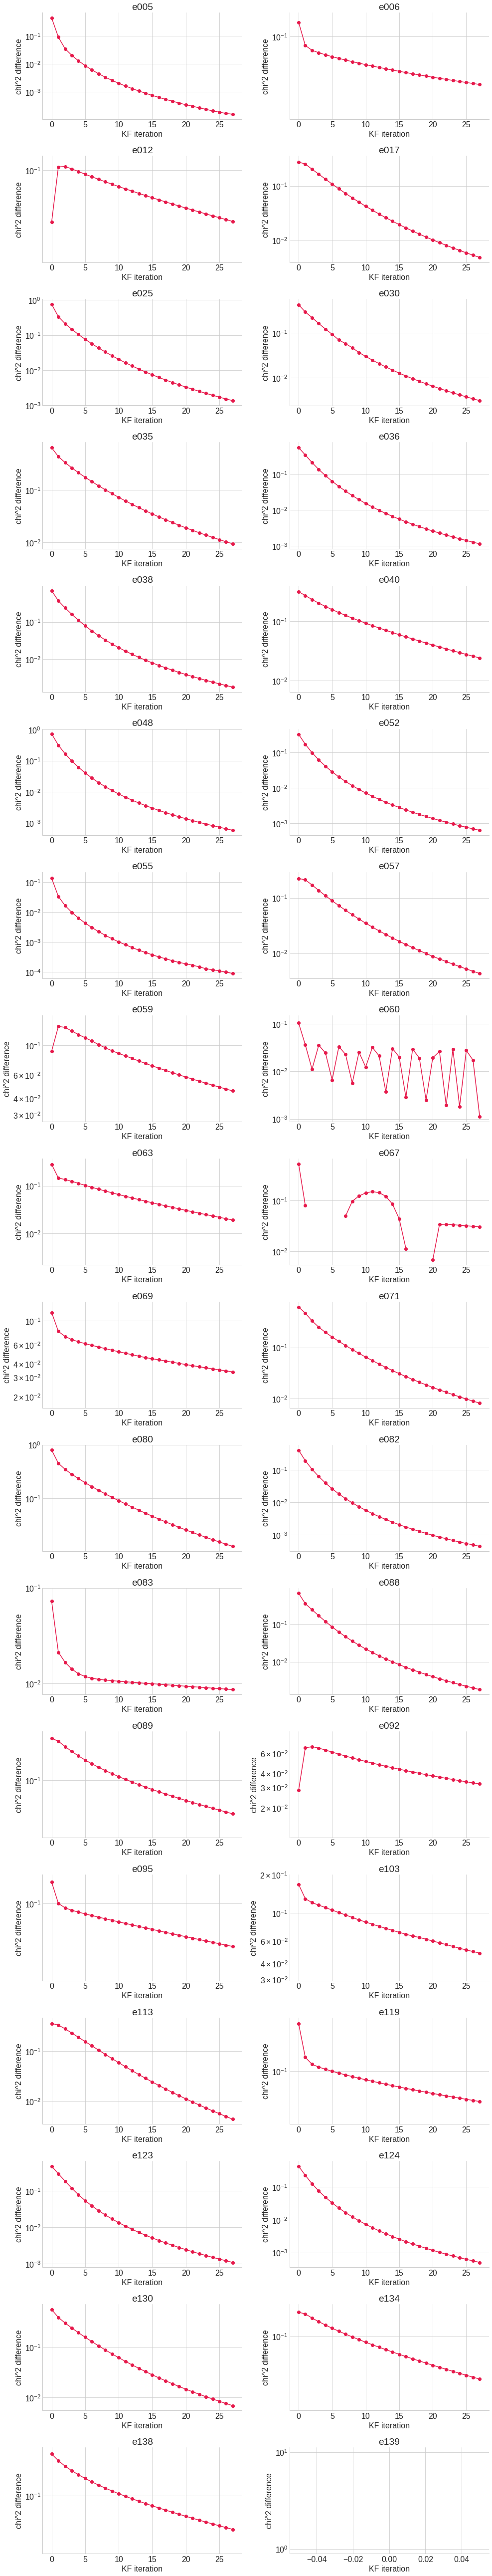

In [18]:
c2len = len(chi2_diff)

index = []
for arr in chi2_diff:
    index.append(np.arange(len(arr)))

f, axes = plt.subplots(nrows=int(c2len/2), ncols=2)
f.set_size_inches((14,int(2*c2len)))

acc95 = accessibility_95
for i in range(0, c2len, 2):
    axes[int(i/2), 0].scatter(index[i],   chi2_diff[i],   color=c_red)
    axes[int(i/2), 0].plot(   index[i],   chi2_diff[i],   color=c_red)
    axes[int(i/2), 1].scatter(index[i+1], chi2_diff[i+1], color=c_red)
    axes[int(i/2), 1].plot(   index[i+1], chi2_diff[i+1], color=c_red)

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].set_title(EVENTFILENAMES[2*i + j])
        axes[i,j].set_yscale("log")
        axes[i,j].set_ylabel("chi^2 difference")
        axes[i,j].set_xlabel("KF iteration")

plt.tight_layout()

plt.show()